In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import scipy
import sklearn
import copy
import importlib
import scanpy as sc


In [4]:
# read in data with complete cells
adata = sc.read('/Users/evanli/Documents/Research_datasets/PBMC_Hao/Hao_PBMC.h5ad')
print(adata.shape)  # row is cells, column is gene
# (161764, 20568)


(161764, 20568)


In [34]:
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
types

['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'other', 'other T']

### 移除在所有B細胞的表現量皆為零的genes

In [35]:
# subset the B cells
adata_B = adata[adata.obs['celltype.l1'] == 'B']
print(adata_B.shape)

(13800, 20568)


In [36]:
# Convert the anndata object to a Pandas DataFrame
df = pd.DataFrame(adata_B.X.toarray(), columns=adata_B.var_names, index=adata_B.obs_names)

# Find the columns that are all zeros
all_zeros = np.where(~df.any(axis=0))[0]

# Remove the columns that are all zeros from the anndata object
adata_B0 = adata_B[:, ~df.columns.isin(df.columns[all_zeros])]

In [37]:
adata_B0.shape

(13800, 19167)

In [39]:
selected_genes_1 = adata_B0.var_names.tolist()

In [38]:
20568 - 19167

1401

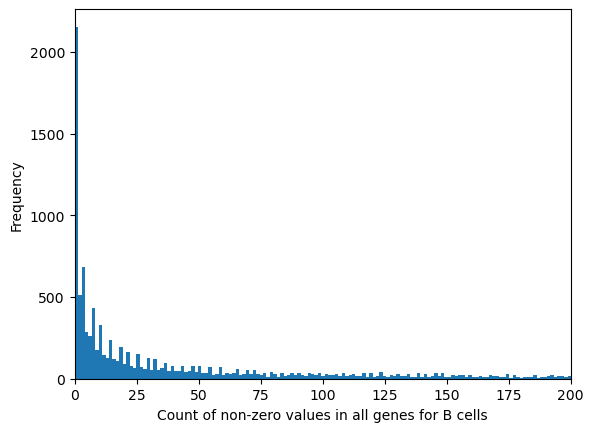

In [61]:
df = pd.DataFrame(adata_B.X.toarray(), columns=adata_B.var_names, index=adata_B.obs_names)

# Count the number of non-zero values in each column
non_zero_counts = np.count_nonzero(df, axis=0)

# Plot the distribution of the non-zero counts
plt.hist(non_zero_counts, bins=10000)
plt.xlabel('Count of non-zero values in all genes for B cells')
plt.xlim(0, 200)
plt.ylabel('Frequency')
plt.show()

### 從Prevalence 處移除prevalence = 0 的基因

In [3]:
import os
os.chdir('/Users/evanli/Documents/EvanPys/Progress')

from ADlasso2 import AD2_w_utils_remove_pvl0 as ad

In [6]:
adata.shape

(161764, 20568)

In [24]:
celltype = 'B'
celltype_label = [1 if x == celltype else 0 for x in label]

class_content = np.unique(celltype_label)
y = np.array([0 if yi == class_content[0] else 1 for yi in celltype_label])
celltype_indices = [idx for idx, l in enumerate(y) if l == 1]
prevalence = ad.get_prevalence(adata.X, celltype_indices)

In [30]:
prevalence.shape

(20568,)

In [32]:
sum(prevalence == 0)

1401

In [33]:
20568 - 17774

2794

In [40]:
adata_B_pvl0 = adata_B[:, prevalence != 0]
adata_B_pvl0.shape

(13800, 19167)

In [42]:
selected_genes_2 = adata_B_pvl0.var_names.tolist()

In [43]:
# compare the two gene lists from two methods
set(selected_genes_1) - set(selected_genes_2)

# two lists are identical

set()

In [45]:
sum(a == b for a, b in zip(selected_genes_1, selected_genes_2))

19167

In [48]:
# count celltype CD4 T cells
sum(adata.obs['celltype.l1'] == 'NK')

18664

In [50]:
18664/5

3732.8